https://github.com/Lecturer-Jcds/Exam-Data-Analytics-Visualization

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
import seaborn as sns

In [33]:
df = pd.read_csv('Supermarket.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [38]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(1).values
    ])

In [39]:
pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

# Pengecekan Nama Kolom, Tipe Data dan Missing Value

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Invoice ID,object,0,0.0,1000,[885-17-6250]
1,Branch,object,0,0.0,3,[C]
2,City,object,0,0.0,3,[Naypyitaw]
3,Customer type,object,0,0.0,2,[Member]
4,Gender,object,0,0.0,2,[Female]
5,Product line,object,0,0.0,6,[Health and beauty]
6,Unit price,float64,0,0.0,943,[55.39]
7,Quantity,int64,0,0.0,10,[7]
8,Tax 5%,float64,0,0.0,990,[17.478]
9,Total,float64,0,0.0,990,[204.246]


In [46]:
# Pengecekan Kolom Numerikal
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


# Problem & Goals
- Meningkatkan jumlah Transaksi dengan Mengurangi Payment Bertipe Cash

In [108]:
# Pengecekan Jumlah Customer berdasarkan Customer Type dan Gender
gender=pd.crosstab(index=df['Gender'], columns='Count')
gender.reset_index(inplace=True)
gender

col_0,Gender,Count
0,Female,501
1,Male,499


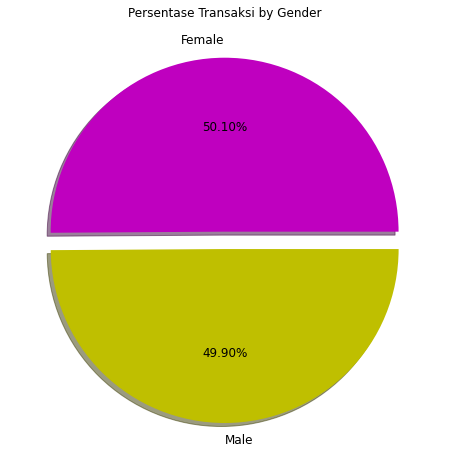

In [110]:
plt.figure(figsize=(10,8))
plt.pie(gender['Count'], labels=gender['Gender'], 
        autopct='%.2f%%',shadow=True, colors=['m', 'y'],
       textprops={
           'size' : 12,
           'color' : 'black'
       },
        explode=(0.05, 0.05))
plt.title('Persentase Transaksi by Gender')
plt.show()

# Insight
Melihat Perbandingan Female-Male cenderung seimbang dengan Presentase Female 50.10% dan Male 49.90%

In [118]:

paygen=pd.crosstab(index=df['Gender'], columns=df['Payment'])
paygen.reset_index(inplace=True)
paygen

Payment,Gender,Cash,Credit card,Ewallet
0,Female,178,163,160
1,Male,166,148,185


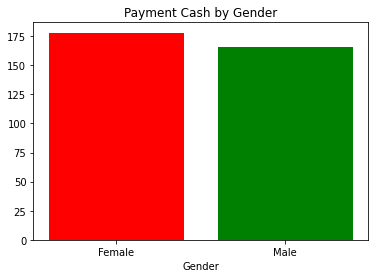

In [124]:
plt.bar(paygen['Gender'],paygen['Cash'], color=['r','g'])
plt.title('Payment Cash by Gender')
plt.xlabel('Gender')
plt.show()

# Insight
Gender Female Paling banyak melakukan Payment dengan Cash (178) dibandingkan Male yg melakukan Payment dengan Cash (166)


In [147]:
# Pengecekan Transaksi Product Line Female
female= df[df['Gender']=='Female']
fepro=pd.crosstab(index=female['Gender'], columns=female['Product line']).T
fepro.reset_index(inplace=True)
fepro


Gender,Product line,Female
0,Electronic accessories,84
1,Fashion accessories,96
2,Food and beverages,90
3,Health and beauty,64
4,Home and lifestyle,79
5,Sports and travel,88


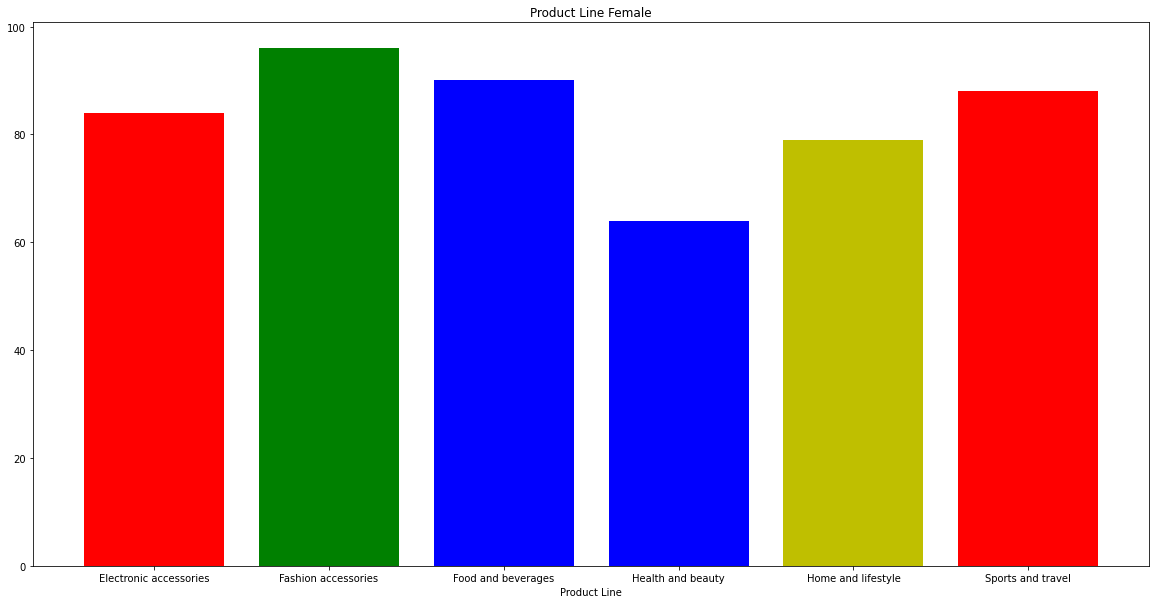

In [151]:
plt.figure(figsize=(20,10))
plt.bar(fepro['Product line'],fepro['Female'], color=['r','g','b','b','y'])
plt.title('Product Line Female')
plt.xlabel('Product Line')
plt.show()

# Insight
Female paling banyak membeli di Product Line Fashion Accessories (96)

In [152]:
# Pengecekan Transaksi Product Line Male
male= df[df['Gender']=='Male']
mapro=pd.crosstab(index=male['Gender'], columns=male['Product line']).T
mapro.reset_index(inplace=True)
mapro

Gender,Product line,Male
0,Electronic accessories,86
1,Fashion accessories,82
2,Food and beverages,84
3,Health and beauty,88
4,Home and lifestyle,81
5,Sports and travel,78


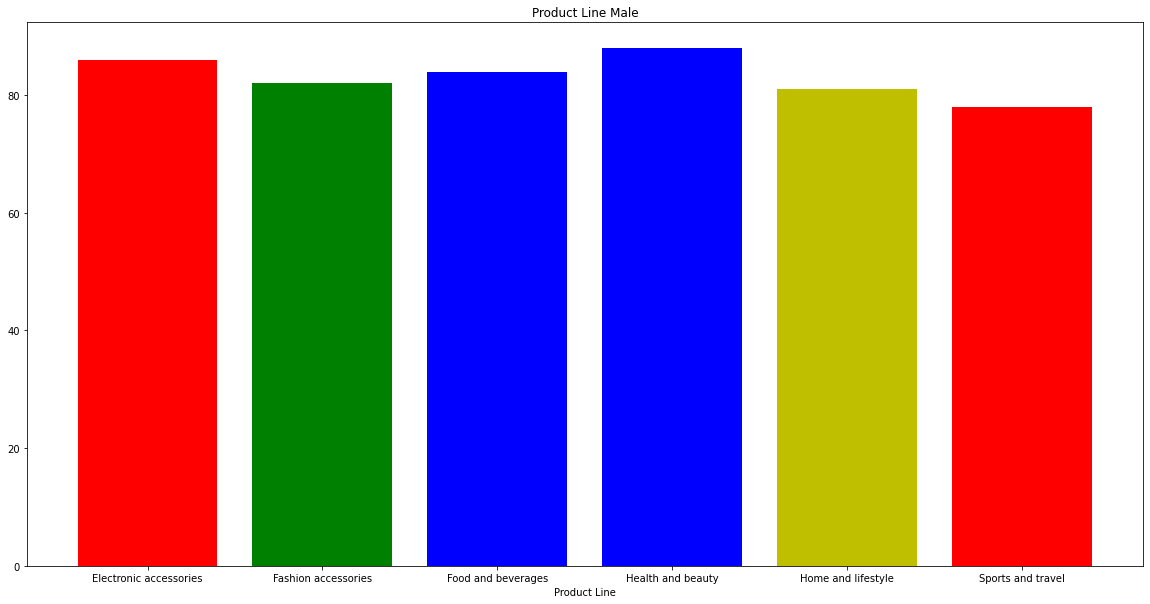

In [154]:
plt.figure(figsize=(20,10))
plt.bar(mapro['Product line'],mapro['Male'], color=['r','g','b','b','y'])
plt.title('Product Line Male')
plt.xlabel('Product Line')
plt.show()

# Insight
Male paling banyak membeli di Product Line Health and Beauty (88) dan Electronics Accessories (86)

In [141]:
# Jam Buka Supermarket
df['Time'].min()

'10:00'

In [143]:
# Jam Tutup Supermarket
df['Time'].max()

'20:59'

In [145]:
# Rata-rata Transaksi Harian
round(pd.crosstab(index=df['Date'], columns='Count').mean(),0)

col_0
Count    11.0
dtype: float64

In [137]:
df_sum=pd.pivot_table(data=df, index='Payment', aggfunc='sum')
df_sum

,Quantity,Rating,Tax 5%,Total,Unit price,cogs,gross income,gross margin percentage
Payment,,,,,,,,
Cash,1896,2397.7,5343.170,112206.570,19525.09,106863.40,5343.170,1638.095238
Credit card,1722,2178.0,4798.432,100767.072,16916.68,95968.64,4798.432,1480.952381
Ewallet,1892,2397.0,5237.767,109993.107,19230.36,104755.34,5237.767,1642.857143


In [140]:
# Rata-rata Gross Income per Transaksi
round(df_sum['gross income'].mean(),2)

5126.46

# Rekomendasi
Melakukan Promo tertentu jika melakukan Metode Payment selain Cash
- Contoh : Melakukan Diskon untuk Product line Fashion Accesories jika melakukan Payment dengan Ewallet/Credit Card guna menambah minat belanja pada Gender Female
- Contoh : Melakukan Promo Buy 2 Get 3 untuk Product line Health and Beauty serta Electronics Accessories jika melakukan Payment dengan Ewallet guna menambah minat belanja pada Gender Male

# Asumsi
Rata-rata Transaksi Harian adalah 11 Transaksi

Rata-rata Gross Income per Transaksi 5126.46

Rata-rata Gross Income per Hari = 11 x 5126.46 = 56391.06

Jika Jumlah Transaksi Harian bisa bertambah sampai 20%
- rata rata transaksi harian bertambah 2 menjadi 13 Transaksi per harian
- penambahan Gross Income 2 X 5126.46 = 10252.92
- rata rata Gross Income per Hari menjadi 56391.06 + 10252.92 = 
66643.98

### Berita Terkait Metoda Cashless berpotensi menambah pelanggan
https://www.paper.id/blog/headline/kenapa-harus-cashless/